# Solutions
Simulation results will be different unless you use the seed. Check that your strategy for completing the exercises is similar to the sample solutions here, in that case.

## Exercise 1
Simulate December 2018 using the seed of 27.

In [1]:
!python ../../ch_08/simulate.py \
    -s 27 \
    -u ../../ch_08/user_data/user_base.txt \
    -i ../../ch_08/user_data/user_ips.json \
    -l dec_2018_log.csv \
    -hl dec_2018_attacks.csv \
    31 "2018-12-01"

[INFO] [ simulate.py ] Simulating 31.0 days...
[INFO] [ simulate.py ] Saving logs
[INFO] [ simulate.py ] All done!


## Imports for Remaining Exercises

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
pd.read_csv('dec_2018_log.csv', parse_dates=True, index_col='datetime')

,source_ip,username,success,failure_reason
datetime,,,,
2018-12-01 04:49:47.142477,230.51.96.84,wkim,True,NaN
2018-12-01 05:04:23.263704,51.241.77.10,ibrown,True,NaN
2018-12-01 05:09:22.549408,51.241.77.10,ibrown,True,NaN
2018-12-01 06:09:26.126252,87.106.250.46,ssmith,False,error_wrong_password
2018-12-01 06:09:27.126252,87.106.250.46,ssmith,False,error_wrong_password
...,...,...,...,...
2018-12-31 22:05:11.939509,63.245.107.31,cjones,True,NaN
2018-12-31 22:29:31.725546,63.245.107.31,cjones,True,NaN
2018-12-31 22:32:00.695686,63.245.107.31,cjones,True,NaN


In [11]:
dec_attack = pd.read_csv('dec_2018_attacks.csv')
dec_attack

,start,end,source_ip
0,2018-12-01 06:09:25.126252,2018-12-01 06:13:32.126252,87.106.250.46
1,2018-12-02 17:08:51.659516,2018-12-02 17:13:06.659516,124.100.154.251
2,2018-12-02 22:31:34.932660,2018-12-02 22:35:47.932660,162.193.160.52
3,2018-12-03 03:41:24.236627,2018-12-03 03:41:58.236627,3.187.98.222
4,2018-12-04 04:51:10.436412,2018-12-04 04:55:18.436412,12.203.107.201
5,2018-12-04 06:33:49.212236,2018-12-04 06:38:03.212236,189.129.85.67
6,2018-12-05 08:34:28.448176,2018-12-05 08:38:43.448176,130.0.243.199
7,2018-12-06 13:19:19.870073,2018-12-06 13:22:45.870073,119.224.29.115
8,2018-12-07 23:09:16.749674,2018-12-07 23:10:50.749674,81.169.193.182
9,2018-12-10 05:49:18.805774,2018-12-10 05:53:23.805774,184.99.196.253


## Exercise 2
Find the number of unique usernames, attempts, successes, failures, and success/failure rates per IP address.

In [15]:
log_aggs = dec_log.assign(
    failures=lambda x: np.invert(x.success)
).groupby('source_ip').agg(
    {'username': 'nunique', 'success':'sum', 'failures': 'sum'}
).assign(
    attempts=lambda x: x.success + x.failures,
    success_rate=lambda x: x.success / x.attempts,
    failure_rate=lambda x: 1 - x.success_rate
)
log_aggs

,username,success,failures,attempts,success_rate,failure_rate
source_ip,,,,,,
1.138.149.116,1,21.0,0.0,21.0,1.000000,0.000000
100.43.18.36,1,15.0,0.0,15.0,1.000000,0.000000
101.113.31.197,1,9.0,0.0,9.0,1.000000,0.000000
101.154.143.93,1,28.0,1.0,29.0,0.965517,0.034483
102.133.183.240,1,6.0,0.0,6.0,1.000000,0.000000
...,...,...,...,...,...,...
96.19.200.227,1,8.0,0.0,8.0,1.000000,0.000000
96.42.66.7,1,10.0,0.0,10.0,1.000000,0.000000
97.233.182.38,1,2.0,0.0,2.0,1.000000,0.000000


In [16]:
dec_log = pd.read_csv('dec_2018_log.csv', parse_dates=True, index_col='datetime')

log_aggs = dec_log.assign(
    failures=lambda x: np.invert(x.success)
).groupby('source_ip').agg(
    {'username': 'nunique', 'success':'sum', 'failures': 'sum'}
).assign(
    attempts=lambda x: x.success + x.failures,
    success_rate=lambda x: x.success / x.attempts,
    failure_rate=lambda x: 1 - x.success_rate
).dropna().reset_index()

log_aggs

,source_ip,username,success,failures,attempts,success_rate,failure_rate
0,1.138.149.116,1,21.0,0.0,21.0,1.000000,0.000000
1,100.43.18.36,1,15.0,0.0,15.0,1.000000,0.000000
2,101.113.31.197,1,9.0,0.0,9.0,1.000000,0.000000
3,101.154.143.93,1,28.0,1.0,29.0,0.965517,0.034483
4,102.133.183.240,1,6.0,0.0,6.0,1.000000,0.000000
...,...,...,...,...,...,...,...
289,96.19.200.227,1,8.0,0.0,8.0,1.000000,0.000000
290,96.42.66.7,1,10.0,0.0,10.0,1.000000,0.000000
291,97.233.182.38,1,2.0,0.0,2.0,1.000000,0.000000
292,97.32.235.17,71,23.0,97.0,120.0,0.191667,0.808333


In [22]:
l = [2,4,5]
s = [2,3,"s"]
print((dict(zip(l, s))))

{2: 2, 4: 3, 5: 's'}


AxesSubplot(0.547727,0.125;0.352273x0.755)


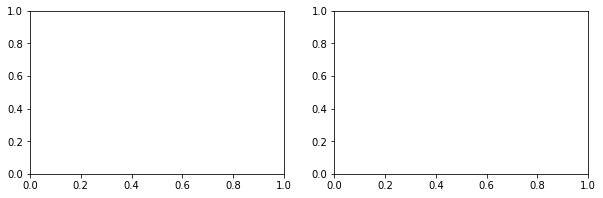

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
print(axes[1])

## Exercise 3
Create two subplots with failures versus attempts on the left and failure rate versus distinct usernames on the right. Draw a decision boundary for what you see. Be sure to color by whether or not it is a hacker IP address.

In [27]:
l = [fig1,fig2]
s = (("m", "j"), (7, 9))
for ax, (x, y) in zip(l, s):
    print("ax:", ax)
    print("s:", (x, y))
    print("x:", x)
    print("y:", y)
    print("---------")

ax: 2
s: ('m', 'j')
x: m
y: j
---------
ax: 4
s: (7, 9)
x: 7
y: 9
---------


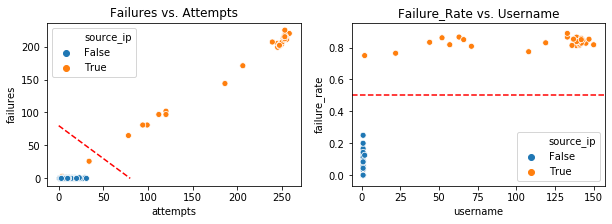

In [37]:
is_attack_ip = log_aggs.source_ip.isin(
    pd.read_csv('dec_2018_attacks.csv').source_ip
)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# zip has two params (k, z)
# for 

for ax, (x, y) in zip(axes, (('attempts', 'failures'), ('username', 'failure_rate'))):
    ax = sns.scatterplot(
        x=log_aggs[x], 
        y=log_aggs[y], 
        hue=is_attack_ip,
        ax=ax)
    
    ax.set_title(f'{y.title()} vs. {x.title()}')

# boundaries
axes[0].plot([0, 80], [80, 0], 'r--')
axes[1].axhline(0.5, color='red', linestyle='--')

## Exercise 4
Build a rule-based criteria using percent difference from the median that flags an IP address if failures and attempts are 5 times the median OR if distinct usernames is 5 times the median.

In [5]:
hourly_ip_logs = dec_`´¡log.assign(
    failures=lambda x: n p.invert(x.success)
).groupby('source_ip').resample('1H').agg(
    {'username': 'nunique', 'success':'sum', 'failures': 'sum'}
).assign(
    attempts=lambda x: x.success + x.failures,
    success_rate=lambda x: x.success / x.attempts,
    failure_rate=lambda x: 1 - x.success_rate
).dropna().reset_index()

hourly_ip_logs.head()

,source_ip,datetime,username,success,failures,attempts,success_rate,failure_rate
0,1.138.149.116,2018-12-11 05:00:00,1,4.0,0.0,4.0,1.0,0.0
1,1.138.149.116,2018-12-11 06:00:00,1,1.0,0.0,1.0,1.0,0.0
2,1.138.149.116,2018-12-19 23:00:00,1,1.0,0.0,1.0,1.0,0.0
3,1.138.149.116,2018-12-24 16:00:00,1,3.0,0.0,3.0,1.0,0.0
4,1.138.149.116,2018-12-25 04:00:00,1,3.0,0.0,3.0,1.0,0.0


Function from chapter for getting baselines:

In [6]:
def get_baselines(hourly_ip_logs, func, *args, **kwargs):
    """
    Calculate hourly bootstrapped statistic per column.
    
    Parameters:
        - hourly_ip_logs: Data to sample from.
        - func: Statistic to calculate.
        - args: Additional positional arguments for `func`
        - kwargs: Additional keyword arguments for `func`
    
    Returns:
        A pandas DataFrame of hourly bootstrapped statistics
    """
    if isinstance(func, str):
        func = getattr(pd.DataFrame, func)
    return hourly_ip_logs.assign(
        hour=lambda x: x.datetime.dt.hour
    ).groupby('hour').apply(
        lambda x: x.sample(10, random_state=0, replace=True).pipe(func, *args, **kwargs)
    )

Get baseline:

In [7]:
medians = get_baselines(hourly_ip_logs, 'median')

Flag if both failures and attempts are 5 times higher than the median or if usernames tried is 5 times higher than the median:

In [8]:
flagged_ips = hourly_ip_logs.assign(
    hour=lambda x: x.datetime.dt.hour
).join(
    medians, on='hour', rsuffix='_median'
).assign(
    flag_median=lambda x: np.logical_or(
        np.logical_and(
            x.failures_median * 5 <= x.failures,
            x.attempts_median * 5 <= x.attempts
        ), x.username_median * 5 <= x.username
    )
).query('flag_median').source_ip.drop_duplicates()

## Exercise 5
Calculate metrics to evaluate how well the ensemble method performed. We can use the `evaluate()` function from the chapter:

In [9]:
def evaluate(alerted_ips, attack_ips, log_ips):
    """
    Calculate true positives (TP), false positives (FP), 
    true negatives (TN), and false negatives (FN) for 
    IP addresses flagged as suspicious.
    
    Parameters:
        - alerted_ips: Pandas series of flagged IP addresses
        - attack_ips: Pandas series of attacker IP addresses
        - log_ips: Pandas series of all IP addresses seen
    
    Returns:
        Tuple of form (TP, FP, TN, FN)
    """
    tp = alerted_ips.isin(attack_ips).sum()
    tn = log_ips[log_ips.isin(alerted_ips)].isin(attack_ips).sum()
    fp = np.invert(
        log_ips[log_ips.isin(alerted_ips)].isin(attack_ips)
    ).sum()
    fn = np.invert(
        log_ips[log_ips.isin(attack_ips)].isin(alerted_ips)
    ).sum()
    return tp, fp, tn, fn

Next we make a partial to store the attacker IP addreses and the unique IP addresses in the logs:

In [10]:
# make this easier to call
from functools import partial
scores = partial(
    evaluate, 
    attack_ips=pd.read_csv('dec_2018_attacks.csv').source_ip, 
    log_ips=dec_log.source_ip.drop_duplicates()
)

We can evaluate the performance with the `classification_stats()` function from the chapter:

In [11]:
def classification_stats(tp, fp, tn, fn):
    """Calculate accuracy, precision, recall, and F1-score"""
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = 2 * precision * recall / (precision + recall)
    return {
        'accuracy' : (tp + tn) / (tp + fp + tn + fn),
        'precision' : precision,
        'recall' : recall,
        'F1-score' : f1_score
    }

Performance is pretty good:

In [12]:
classification_stats(*scores(flagged_ips))

{'accuracy': 0.918918918918919,
 'precision': 0.8717948717948718,
 'recall': 0.9714285714285714,
 'F1-score': 0.9189189189189189}